In [3]:
import pandas as pd 
import os
import numpy as np
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [1]:
filename = 'F:/UOSEST/Data/P2-1_Improve_Model_Core_assay/input/6_assay/TOX21_AhR_LUC_Agonist(input).csv'
#filename = 'pparg_ligand_data.txt'

data = pd.read_csv(filename,header=0)

In [9]:
data

,Unnamed: 0,SMILES,Type
0,1,NC1=C(Cl)C(Cl)=NC(C(O)=O)=C1Cl,1
1,2,CNC(=O)OC1=C(C=C(C)C=C1C(C)(C)C)C(C)(C)C,0
2,3,[Br-].C[N+](C)(C)CCO,0
3,4,Br.CC(CC1=CC=C(O)C=C1)NCC(O)C1=CC(O)=CC(O)=C1,0
4,5,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,0
5,6,CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,0
6,7,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,0
7,8,CCC1(C(=O)NC(=O)NC1=O)C1=CC=CC=C1,0
8,9,CO[C@]12[C@H]3N[C@H]3CN1C1=C([C@H]2COC(N)=O)C(...,0
9,10,[Br-].CC[N+](C)(CC)CCOC(=O)C(O)(C1CCCCC1)C1=CC...,0


In [7]:
print(list(data))

['Unnamed: 0', 'SMILES', 'Type']


In [11]:
d = data.drop(columns='Unnamed: 0')

In [12]:
d.shape

(7932, 2)

0    7123
1     809
Name: Type, dtype: int64

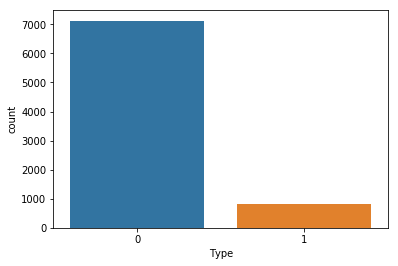

In [13]:
sns.countplot(d['Type'])
d['Type'].value_counts()

In [14]:
encoder = LabelEncoder()
encoder.fit(d['Type'])
enc_y = encoder.transform(d['Type'])


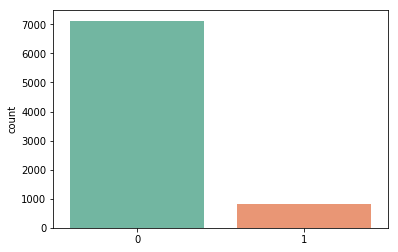

In [15]:
sns.countplot(enc_y, palette="Set2")

In [17]:
np.histogram(enc_y)

(array([7123,    0,    0,    0,    0,    0,    0,    0,    0,  809],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [47]:
mols = []
fps = []
for index, row in d.iterrows():
        mol = Chem.MolFromSmiles(row['SMILES'])
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        mols.append(mol)
        fps.append(fp)
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    #np_fps.append(DataStructs.BitVectToText(fp))
    DataStructs.ConvertToNumpyArray(fp,arr)
    np_fps.append(arr)
    
np_fps = np.array(np_fps,dtype=float)

In [48]:
np_fps

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# pandas method that Confirm duplication
keep='first'가 default 이며, 중복값이 있으면 첫번째 값을 duplicated 여부를 False로 반환하고, 나머지 중복값에 대해서는 True를 반환하게 됩니다. keep='last'는 그 반대
if keep=False는 처음이나 끝값인지 여부는 고려를 안하고 중복이면 무조건 True를 반환합니다

reference : https://rfriend.tistory.com/266

0    565
1     16
Name: Type, dtype: int64

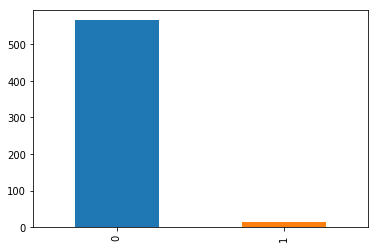

In [49]:
fingerPrints = pd.DataFrame(np_fps)
duplicates = d[fingerPrints.duplicated(keep=False)] #return lsit[ture,flase,ture....] to selct column that duplicated
duplicates["Type"].value_counts().plot(kind="bar") #count chmicals that has duplicated fingerfrint
duplicates["Type"].value_counts()

7931개의 pringerfrint중 (0)561개,(1)16개가 duplicated  

# Smote를 적용한 후엔 duplicated fingerfrint가 얼마나 많아지는지 보자

In [38]:
sm = SMOTE(random_state=12, ratio = 'minority')
x_train_res, y_train_res = sm.fit_sample(np.array(np_fps, dtype=float), enc_y) # dtype = int로 하니까 duplicate가 많이 생기지 this is problem not problem of imbleanr version

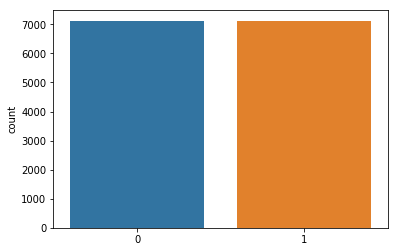

In [39]:
sns.countplot(y_train_res)

In [63]:
list(smoteduplicates)

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 1., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 1., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

# Smote후의 duplication

(array([565,   0,   0,   0,   0,   0,   0,   0,   0,  31], dtype=int64), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


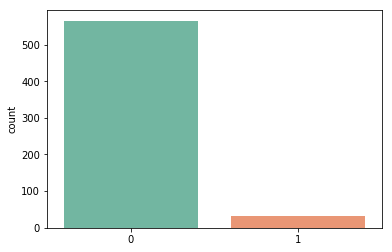

In [66]:
smotefingerprints = pd.DataFrame(x_train_res)
smoteduplicates = x_train_res[smotefingerprints.duplicated(keep=False).values] #keep =Fasle주의하자
print(str(np.histogram(y_train_res[smotefingerprints.duplicated(keep=False).values])))

sns.countplot(y_train_res[smotefingerprints.duplicated(keep=False).values], palette="Set2")

# 1인 chemical 에서 duplicated fingerfint가 조금 늘어났다 16->31

In [23]:
#dupfings = fingerPrints[fingerPrints.duplicated(keep='first')]
#d[~fingerPrints.duplicated(keep=False)]

In [44]:
mychems = []
for item in np_fps:
    #print(item)
    item = np.array(item,dtype=int)
    s = item.tolist()
    t = [str(i) for i in s]
    mychems.append(''.join(t))

In [45]:
i = 0
counter = 0
test = list(set(mychems))
for item in test:
    j = 0
    for item2 in mychems:
        if item == item2 :
            if (d['Type'][i] != d['Type'][j]) :
                #print('dup'+str(i)+' ' + str(j))
                counter +=1
        j+=1
    i+=1
print('Total Duplicate values with different answer'+str(counter))

Total Duplicate values with different answer1419


In [46]:
i = 0
counter = 0
chemdict = {} #딗셔너리.
listofdups = []
for item in mychems:
    try:
        chemdict[str(item)].append(i)
        #print('dup found')
        for j in range(len(chemdict[str(item)])):
            if (d['Type'][i] != d['Type'][chemdict[str(item)][j]]) :
                listofdups.append(i)
                counter+=1
    except:
        #print('adding new')
        chemdict[str(item)] = []
        chemdict[str(item)].append(i)
    i+=1
print(str(counter)+' '+str(len(list(set(listofdups)))))
#smote적용하기 전에서 listofdups를 빼면 된다!



43 17


# Imblearn version

In [ ]:
import imblearn

In [ ]:
print(str(imblearn.__version__))

In [ ]:
print(str(imblearn.__version__))